In [1]:
import pandas as pd

In [2]:
df18 = pd.read_csv("data/2018_comptage-velo-donnees-compteurs.csv", on_bad_lines='skip')
df18.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/2018_comptage-velo-donnees-compteurs.csv'

In [3]:
colsToKeep = [
    # 'Identifiant du compteur',
    # 'Nom du compteur',
    # 'Identifiant du site de comptage',
    'Nom du site de comptage',
    'Comptage horaire',
    'Date et heure de comptage',
    #"Date d'installation du site de comptage",
    #'Lien vers photo du site de comptage',
    'Coordonnées géographiques',
    # 'Identifiant technique compteur',
    # 'ID Photos',
    # 'test_lien_vers_photos_du_site_de_comptage_',
    # 'id_photo_1',
    # 'url_sites',
    # 'type_dimage',
    # 'mois_annee_comptage'
]
df18 = pd.read_csv('data/2018_comptage-velo-donnees-compteurs.csv', sep=";", usecols=colsToKeep, on_bad_lines='skip')
df18.head()



,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques
0,6 rue Julia Bartet,4,2018-11-29T01:00:00+01:00,"48.82648,2.303149"
1,6 rue Julia Bartet,30,2018-11-29T22:00:00+01:00,"48.82648,2.303149"
2,6 rue Julia Bartet,116,2018-11-30T17:00:00+01:00,"48.82648,2.303149"
3,6 rue Julia Bartet,0,2018-12-03T01:00:00+01:00,"48.82648,2.303149"
4,6 rue Julia Bartet,18,2018-12-03T11:00:00+01:00,"48.82648,2.303149"


In [5]:
df18.shape

(157825, 4)

In [13]:
# Séparer latitude et longitude
df18[['latitude', 'longitude']] = df18['Coordonnées géographiques'].str.split(',', n=1, expand=True)

df18["Date et heure de comptage"] = pd.to_datetime(
    df18["Date et heure de comptage"], 
    utc=True,    # rend les dates tz‑aware (UTC)
    errors='coerce'
)

In [14]:
df18_sortedbyplace = df18.sort_values(by=["Nom du site de comptage","Date et heure de comptage"])
df18_sortedbyplace.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
42302,10 avenue de la Grande Armée SE-NO,2,2018-07-27 01:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
75640,10 avenue de la Grande Armée SE-NO,0,2018-07-27 02:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
155968,10 avenue de la Grande Armée SE-NO,2,2018-07-27 03:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
46244,10 avenue de la Grande Armée SE-NO,6,2018-07-27 04:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
61046,10 avenue de la Grande Armée SE-NO,13,2018-07-27 05:00:00+00:00,"48.874716,2.292439",48.874716,2.292439


In [10]:
df18_sortedbyplace.shape

(157825, 4)

In [15]:
cols = ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude"]
df18_sites = df18[cols].drop_duplicates(subset=["Nom du site de comptage"])
print(df18_sites.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df18_sites

(35, 4)


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude
0,6 rue Julia Bartet,"48.82648,2.303149",48.82648,2.303149
22,face au 70 Quai de Bercy,"48.8295233,2.38699",48.8295233,2.38699
135,77 Bd Richard Lenoir N-S,"48.860852,2.372279",48.860852,2.372279
170,Face 104 Rue d'Aubervilliers,"48.890457,2.3688522",48.890457,2.3688522
240,Face au 25 quai de l'Oise,"48.8914149,2.384954",48.8914149,2.384954
325,35 Boulevard de Menilmontant NO-SE,"48.860528,2.388364",48.860528,2.388364
362,Pont National NE-SO,"48.82682,2.38465",48.82682,2.38465
392,135 Avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378
864,28 Boulevard Diderot,"48.846028,2.375429",48.846028,2.375429
1147,100 Rue La Fayette O-E,"48.87746,2.35008",48.87746,2.35008


In [16]:
import geopandas as gpd

# 1. Copie du DataFrame de base
df = df18_sites.copy()

# 2. Nettoyage des coordonnées
df['latitude']  = pd.to_numeric(df['latitude'],  errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude'])

# 3. Création d’un GeoDataFrame à partir du DataFrame nettoyé
gdf_sites = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# 4. Chargement et projection des arrondissements
url_geojson = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
gdf_arr = gpd.read_file(url_geojson)
gdf_arr = gdf_arr.to_crs(epsg=4326)

# 5. Spatial join — points dans les polygones
gdf_joined = gpd.sjoin(gdf_sites, gdf_arr, how="left", predicate="within")

# 6. Sélection & renommage des colonnes d’intérêt
df18_final = gdf_joined[
    ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude", "l_ar"]
].rename(columns={"l_ar": "arrondissement"})

df18_final


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,6 rue Julia Bartet,"48.82648,2.303149",48.826480,2.303149,14ème Ardt
22,face au 70 Quai de Bercy,"48.8295233,2.38699",48.829523,2.386990,12ème Ardt
135,77 Bd Richard Lenoir N-S,"48.860852,2.372279",48.860852,2.372279,11ème Ardt
170,Face 104 Rue d'Aubervilliers,"48.890457,2.3688522",48.890457,2.368852,19ème Ardt
240,Face au 25 quai de l'Oise,"48.8914149,2.384954",48.891415,2.384954,19ème Ardt
325,35 Boulevard de Menilmontant NO-SE,"48.860528,2.388364",48.860528,2.388364,11ème Ardt
362,Pont National NE-SO,"48.82682,2.38465",48.826820,2.384650,13ème Ardt
392,135 Avenue Daumesnil SE-NO,"48.843435,2.383378",48.843435,2.383378,12ème Ardt
864,28 Boulevard Diderot,"48.846028,2.375429",48.846028,2.375429,12ème Ardt
1147,100 Rue La Fayette O-E,"48.87746,2.35008",48.877460,2.350080,10ème Ardt


In [17]:
import pandas as pd

def list_to_semicolon_str(lst):
    return "; ".join(str(v) for v in lst if pd.notna(v))

# Regroupement par arrondissement et concaténation des coordonnées
tableau_arr = (
    df18_final
    .groupby("arrondissement", dropna=False)
    .agg({
        "Coordonnées géographiques": lambda x: list_to_semicolon_str(x),
        "latitude": lambda x: list_to_semicolon_str(x),
        "longitude": lambda x: list_to_semicolon_str(x)
    })
    .reset_index()
)

# Trier les arrondissements par numéro — si le nom contient un nombre
# On extrait le premier nombre trouvé dans la chaîne (ex “12e”, “8”, etc.)
tableau_arr['arr_num'] = (
    tableau_arr['arrondissement']
    .str.extract(r'(\d+)', expand=False)  # capture les chiffres
    .astype(float, errors='ignore')       # convertit en float si possible
)

# Trier par ce numéro, en mettant les NaN (arrondissements sans numéro numérique) à la fin
tableau_arr = tableau_arr.sort_values(
    by='arr_num', na_position='last'
).drop(columns='arr_num').reset_index(drop=True)

# Optionnel : afficher tout, mais attention si le tableau est très long
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

tableau_arr


,arrondissement,Coordonnées géographiques,latitude,longitude
0,4ème Ardt,"48.85372,2.35702",48.85372,2.35702
1,6ème Ardt,"48.840801,2.333233",48.840801,2.333233
2,7ème Ardt,"48.86179,2.32014",48.86179,2.32014
3,10ème Ardt,"48.87746,2.35008; 48.877667,2.350556; 48.877726,2.354926; 48.877686,2.3544712",48.87746; 48.877667; 48.877726; 48.877686,2.35008; 2.350556; 2.354926; 2.3544712
4,11ème Ardt,"48.860852,2.372279; 48.860528,2.388364; 48.86077,2.372742; 48.86149,2.37376; 48.86155,2.37407",48.860852; 48.860528; 48.86077; 48.86149; 48.86155,2.372279; 2.388364; 2.372742; 2.37376; 2.37407
5,12ème Ardt,"48.8295233,2.38699; 48.843435,2.383378; 48.846028,2.375429; 48.846099,2.375456",48.8295233; 48.843435; 48.846028; 48.846099,2.38699; 2.383378; 2.375429; 2.375456
6,13ème Ardt,"48.82682,2.38465; 48.826503,2.38434; 48.830449,2.353199; 48.8344028,2.376941; 48.830901,2.353237",48.82682; 48.826503; 48.830449; 48.8344028; 48.830901,2.38465; 2.38434; 2.353199; 2.376941; 2.353237
7,14ème Ardt,"48.82648,2.303149; 48.835143,2.333031; 48.834695,2.332968",48.82648; 48.835143; 48.834695,2.303149; 2.333031; 2.332968
8,16ème Ardt,"48.87451,2.29215; 48.848399,2.275932; 48.839927,2.267151; 48.839883,2.267099",48.87451; 48.848399; 48.839927; 48.839883,2.29215; 2.275932; 2.267151; 2.267099
9,17ème Ardt,"48.881626,2.281203; 48.874716,2.292439; 48.8818100845,2.28154603106",48.881626; 48.874716; 48.8818100845,2.281203; 2.292439; 2.28154603106


In [18]:
df18.shape

(157825, 6)

In [19]:
df18["Date et heure de comptage"] = pd.to_datetime(df18["Date et heure de comptage"], utc=True)
df18["Date et heure de comptage"] = df18["Date et heure de comptage"].dt.tz_convert("Europe/Paris")
date_min = df18["Date et heure de comptage"].min()
date_max = df18["Date et heure de comptage"].max()

print("Date la plus ancienne :", date_min)
print("Date la plus récente :", date_max)

Date la plus ancienne : 2018-01-01 00:00:00+01:00
Date la plus récente : 2018-12-31 00:00:00+01:00


In [ ]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2018
mois = [f"2018-{m:02d}" for m in range(1, 13)]


results_temp = []

# Groupement par arrondissement (issu de df18_final)
for arr, df_arr in df18_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_temp = []

        # Boucle sur les sites de l’arrondissement
        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=apparent_temperature"
                    "&timezone=Europe/Paris"
                )

                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Sécurité si données manquantes
                if "hourly" in data and "apparent_temperature" in data["hourly"]:
                    toutes_temp.extend(data["hourly"]["apparent_temperature"])

            except Exception as e:
                print(f"❌ Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = (
            sum(toutes_temp) / len(toutes_temp)
            if toutes_temp else None
        )

    results_temp.append(lignes_arr)

# DataFrame final
df18_temp_mensuel = pd.DataFrame(results_temp)

# Tri par numéro d’arrondissement
df18_temp_mensuel["arr_num"] = (
    df18_temp_mensuel["arrondissement"]
    .str.extract(r"(\d+)")
    .astype(float)
)

df18_temp_mensuel = (
    df18_temp_mensuel
    .sort_values("arr_num", na_position="last")
    .drop(columns="arr_num")
    .reset_index(drop=True)
)

# Sauvegarde locale
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2018_temperature_mensuelle_moyenne_par_arrondissement.csv"
)

df18_temp_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")


# Affichage
with pd.option_context(
    'display.max_columns', None,
    'display.max_colwidth', None,
    'display.width', None
):
    print(df18_temp_mensuel)


✅ Data sauvegardée dans data/2018_temperature_apparente_mensuelle_par_arrondissement.csv
   arrondissement   2018-01   2018-02   2018-03    2018-04    2018-05  \
0       4ème Ardt  3.850403 -2.890030  3.082930  10.618889  14.700672   
1       6ème Ardt  3.603495 -3.119940  2.844220  10.366528  14.438306   
2       7ème Ardt  3.859812 -2.895536  3.050672  10.573889  14.713710   
3      10ème Ardt  3.661391 -3.080841  2.859106  10.371215  14.503125   
4      11ème Ardt  3.605215 -3.138839  2.858280  10.447111  14.593414   
5      12ème Ardt  3.735249 -3.052679  2.993448  10.551111  14.672749   
6      13ème Ardt  3.757661 -3.008988  3.008817  10.555806  14.660941   
7      14ème Ardt  3.617787 -3.106548  2.856900  10.380509  14.451882   
8      16ème Ardt  3.818817 -2.922954  3.043078  10.574132  14.668011   
9      17ème Ardt  3.733737 -3.012054  2.932437  10.447778  14.581272   
10     19ème Ardt  3.563306 -3.178323  2.817428  10.404306  14.548835   
11     20ème Ardt  3.504167 -3.2357

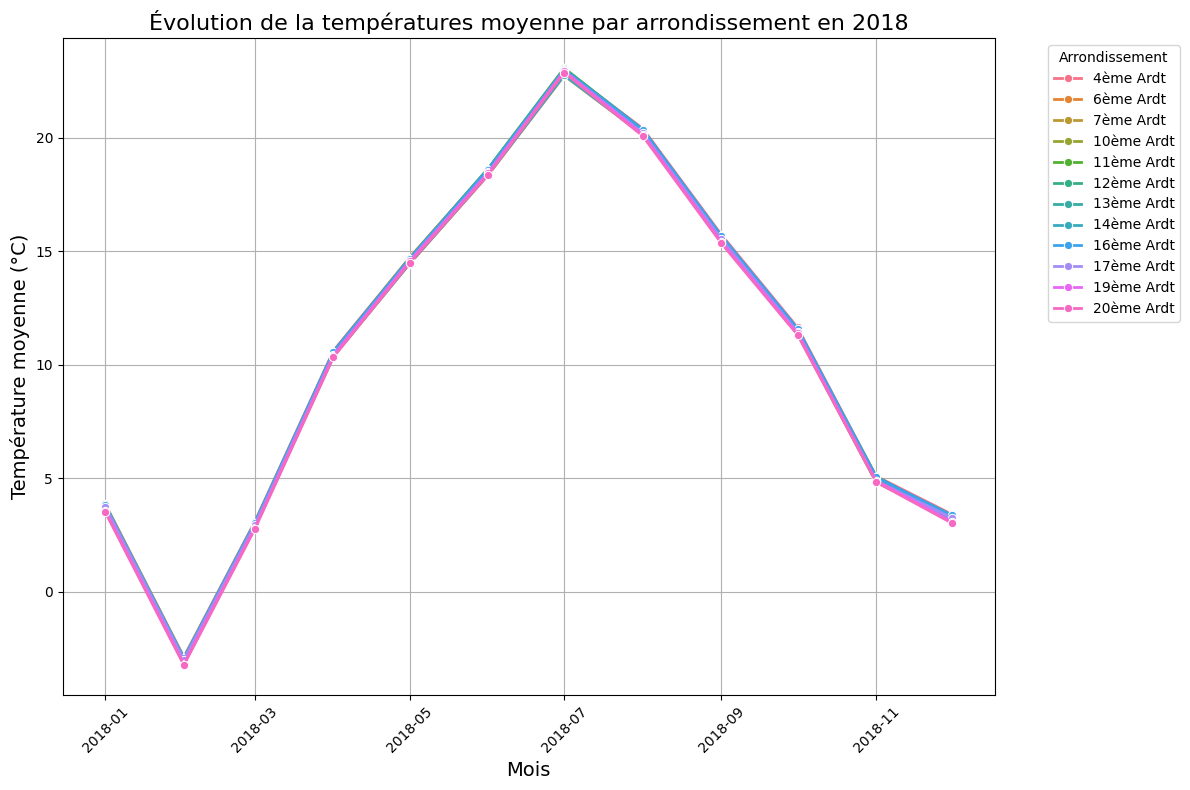

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2018_temperature_mensuelle_moyenne_par_arrondissement.csv"
df18_temp_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df18_long = df18_temp_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="temperature_moyenne_°C"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df18_long["mois"] = pd.to_datetime(df18_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df18_long,
    x="mois",
    y="temperature_moyenne_°C",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la températures moyenne par arrondissement en 2018', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Température moyenne (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2018
mois = [f"2018-{m:02d}" for m in range(1, 13)]

results_precip = []

for arr, df_arr in df18_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_precip = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=precipitation"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Vérifie que la clé existe et étend la liste
                if "hourly" in data and "precipitation" in data["hourly"]:
                    toutes_precip.extend(data["hourly"]["precipitation"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        # Somme des précipitations du mois (total pour l'arrondissement)
        lignes_arr[periode] = sum(toutes_precip) if toutes_precip else None

    results_precip.append(lignes_arr)

df18_precip_mensuel = pd.DataFrame(results_precip)
df18_precip_mensuel["arr_num"] = df18_precip_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df18_precip_mensuel = df18_precip_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2018_precipitations_mensuelles_moyennes_par_arrondissement.csv"
)

df18_precip_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df18_precip_mensuel)  # ou df18_precip_mensuel selon nom variable


✅ Data sauvegardée dans data/2018_precipitations_par_arrondissement_mensuel.csv
   arrondissement  2018-01  2018-02  2018-03  2018-04  2018-05  2018-06  \
9       4ème Ardt    118.1     61.4     93.6     70.5     48.3    101.7   
10      6ème Ardt    118.1     61.4     93.6     70.5     48.3    101.7   
11      7ème Ardt    122.7     60.5     92.2     75.8     42.9     93.2   
0      10ème Ardt    490.8    242.0    368.8    303.2    171.6    372.8   
1      11ème Ardt    712.5    329.0    468.0    370.5    215.0    450.5   
2      12ème Ardt    536.8    240.8    345.6    283.6    165.6    414.8   
3      13ème Ardt    638.8    303.4    446.4    353.7    220.8    514.5   
4      14ème Ardt    354.3    184.2    280.8    211.5    144.9    305.1   
5      16ème Ardt    477.0    244.7    373.0    287.3    187.8    398.3   
6      17ème Ardt    368.1    181.5    276.6    227.4    128.7    279.6   
7      19ème Ardt    427.5    197.4    280.8    222.3    129.0    270.3   
8      20ème Ardt   

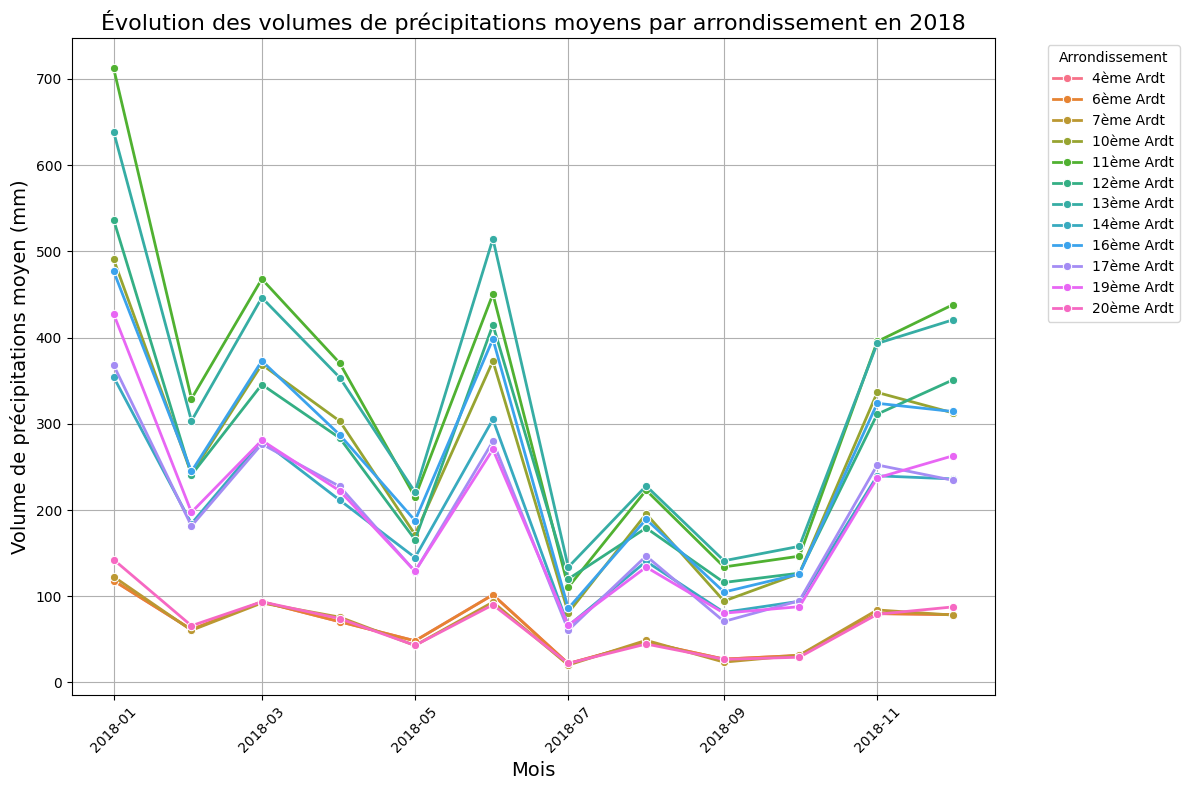

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2018_precipitations_mensuelles_moyennes_par_arrondissement.csv"
df18_precip_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df18_long = df18_precip_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="volumes_precipitations_moyens_mm"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df18_long["mois"] = pd.to_datetime(df18_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df18_long,
    x="mois",
    y="volumes_precipitations_moyens_mm",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution des volumes de précipitations moyens par arrondissement en 2018', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Volume de précipitations moyen (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2018
mois = [f"2018-{m:02d}" for m in range(1, 13)]

results_cloud = []

for arr, df_arr in df18_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_cloud = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=cloud_cover"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                if "hourly" in data and "cloud_cover" in data["hourly"]:
                    toutes_cloud.extend(data["hourly"]["cloud_cover"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = sum(toutes_cloud)/len(toutes_cloud) if toutes_cloud else None

    results_cloud.append(lignes_arr)

df18_cloud_mensuel = pd.DataFrame(results_cloud)
df18_cloud_mensuel["arr_num"] = df18_cloud_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df18_cloud_mensuel = df18_cloud_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2018_cloudcover_mensuel_moyen_par_arrondissement.csv"
)

df18_cloud_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df18_cloud_mensuel)


✅ Data sauvegardée dans data/2018_cloudcover_par_arrondissement_mensuel.csv
   arrondissement    2018-01    2018-02    2018-03    2018-04    2018-05  \
9       4ème Ardt  85.840054  56.561012  77.692204  66.586111  51.744624   
10      6ème Ardt  85.840054  56.561012  77.692204  66.586111  51.744624   
11      7ème Ardt  86.162634  56.281250  77.618280  65.911111  51.079301   
0      10ème Ardt  86.162634  56.281250  77.618280  65.911111  51.079301   
1      11ème Ardt  86.048387  56.904762  77.137097  65.737500  50.522849   
2      12ème Ardt  85.806452  56.956845  77.793011  66.537500  50.783602   
3      13ème Ardt  85.819892  56.798512  77.752688  66.556944  51.168011   
4      14ème Ardt  85.840054  56.561012  77.692204  66.586111  51.744624   
5      16ème Ardt  85.920699  56.491071  77.673723  66.417361  51.578293   
6      17ème Ardt  86.162634  56.281250  77.618280  65.911111  51.079301   
7      19ème Ardt  86.048387  56.904762  77.137097  65.737500  50.522849   
8      20ème

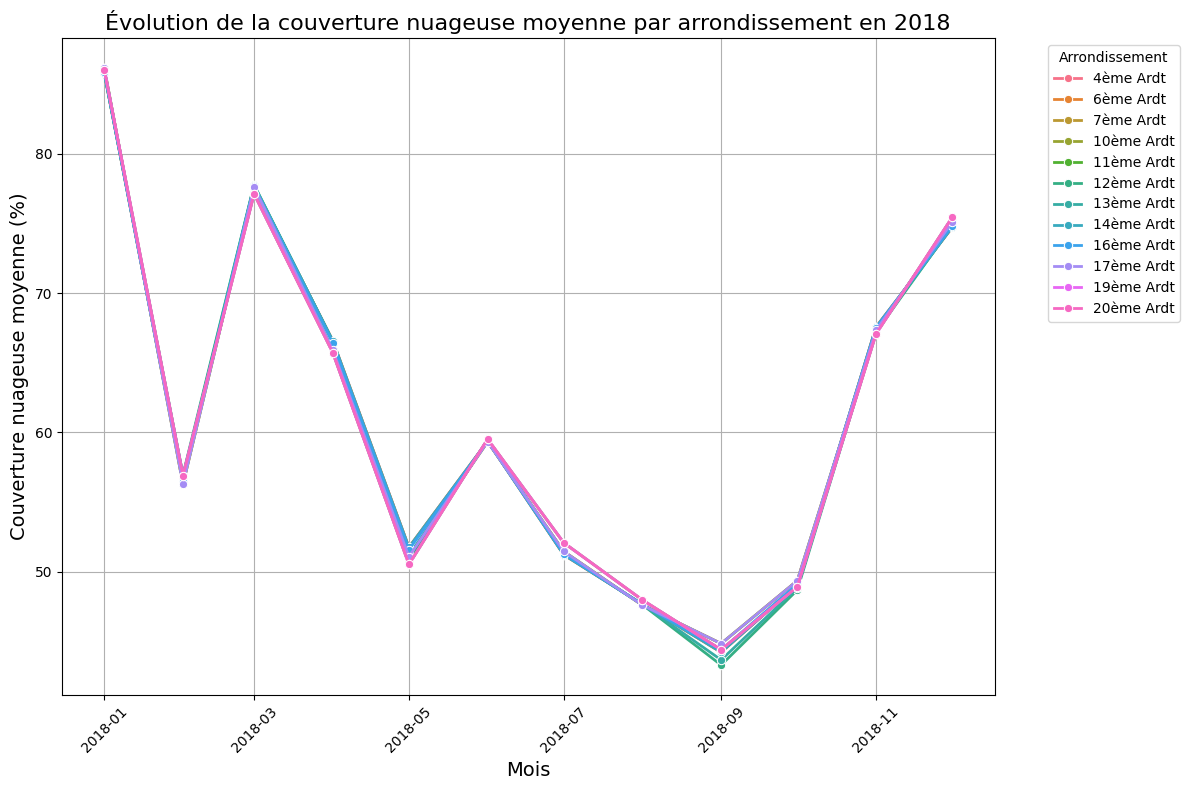

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2018_cloudcover_mensuel_moyen_par_arrondissement.csv"
df18_cloud_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df18_long = df18_cloud_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="couverture_nuageuse_moyenne_%"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df18_long["mois"] = pd.to_datetime(df18_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df18_long,
    x="mois",
    y="couverture_nuageuse_moyenne_%",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la couverture nuageuse moyenne par arrondissement en 2018', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Couverture nuageuse moyenne (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

In [41]:
df19 = pd.read_csv("data/2019_comptage-velo-donnees-compteurs-2.csv", on_bad_lines='skip')
df19.head()

,Identifiant du compteur;Nom du compteur;Identifiant du site de comptage;Nom du site de comptage;Comptage horaire;Date et heure de comptage;Date d'installation du site de comptage;Lien vers photo du site de comptage;Coordonnées géographiques
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;0;2019-01-01T07:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;31;2019-01-02T18:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;24;2019-01-03T16:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;2;2019-01-04T04:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199
100047539-SC;21 Boulevard Auguste Blanqui SO-NE;100047539;21 Boulevard Auguste Blanqui SO-NE;0;2019-01-04T08:00:00+01:00;2018-12-05;https://www.eco-visio.net/Photos/100047539/15765761696560.jpg;48.830449,2.353199


In [42]:
colsToKeep = [
    # 'Identifiant du compteur',
    # 'Nom du compteur',
    # 'Identifiant du site de comptage',
    'Nom du site de comptage',
    'Comptage horaire',
    'Date et heure de comptage',
    #"Date d'installation du site de comptage",
    #'Lien vers photo du site de comptage',
    'Coordonnées géographiques',
    # 'Identifiant technique compteur',
    # 'ID Photos',
    # 'test_lien_vers_photos_du_site_de_comptage_',
    # 'id_photo_1',
    # 'url_sites',
    # 'type_dimage',
    # 'mois_annee_comptage'
]
df19 = pd.read_csv('data/2019_comptage-velo-donnees-compteurs-2.csv', sep=";", usecols=colsToKeep, on_bad_lines='skip')
df19.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques
0,21 Boulevard Auguste Blanqui SO-NE,0,2019-01-01T07:00:00+01:00,"48.830449,2.353199"
1,21 Boulevard Auguste Blanqui SO-NE,31,2019-01-02T18:00:00+01:00,"48.830449,2.353199"
2,21 Boulevard Auguste Blanqui SO-NE,24,2019-01-03T16:00:00+01:00,"48.830449,2.353199"
3,21 Boulevard Auguste Blanqui SO-NE,2,2019-01-04T04:00:00+01:00,"48.830449,2.353199"
4,21 Boulevard Auguste Blanqui SO-NE,0,2019-01-04T08:00:00+01:00,"48.830449,2.353199"


In [43]:
df19.shape

(436729, 4)

In [44]:
# Séparer latitude et longitude
df19[['latitude', 'longitude']] = df19['Coordonnées géographiques'].str.split(',', n=1, expand=True)

df19["Date et heure de comptage"] = pd.to_datetime(
    df19["Date et heure de comptage"], 
    utc=True,    # rend les dates tz‑aware (UTC)
    errors='coerce'
)

In [45]:
df19_sortedbyplace = df19.sort_values(by=["Nom du site de comptage","Date et heure de comptage"])
df19_sortedbyplace.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
436184,10 avenue de la Grande Armée SE-NO,1,2018-12-31 23:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
260738,10 avenue de la Grande Armée SE-NO,0,2019-01-01 00:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
59729,10 avenue de la Grande Armée SE-NO,3,2019-01-01 01:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
398556,10 avenue de la Grande Armée SE-NO,3,2019-01-01 02:00:00+00:00,"48.874716,2.292439",48.874716,2.292439
302305,10 avenue de la Grande Armée SE-NO,2,2019-01-01 03:00:00+00:00,"48.874716,2.292439",48.874716,2.292439


In [46]:
cols = ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude"]
df19_sites = df19[cols].drop_duplicates(subset=["Nom du site de comptage"])
print(df19_sites.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df19_sites

(60, 4)


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude
0,21 Boulevard Auguste Blanqui SO-NE,"48.830449,2.353199",48.830449,2.353199
452,Pont du Garigliano NO-SE,"48.839927,2.267151",48.839927,2.267151
886,102 Bd magenta SE-NO,"48.877726,2.354926",48.877726,2.354926
1317,26 Boulevard de Ménilmontant SE-NO,"48.860622,2.388724",48.860622,2.388724
1491,16 Avenue de la Porte des Ternes E-O,"48.8818100845,2.28154603106",48.8818100845,2.28154603106
1911,Face au 16 Avenue de la Porte des Ternes O-E,"48.881626,2.281203",48.881626,2.281203
2327,72 Bd Richard Lenoir S-N,"48.86077,2.372742",48.86077,2.372742
2927,pont des Invalides S-N,"48.86282,2.31061",48.86282,2.31061
2998,33 avenue des Champs Elysées NO-SE,"48.869831,2.307076",48.869831,2.307076
3078,129 Rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301


In [47]:
import geopandas as gpd

# 1. Copie du DataFrame de base
df = df19_sites.copy()

# 2. Nettoyage des coordonnées
df['latitude']  = pd.to_numeric(df['latitude'],  errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude'])

# 3. Création d’un GeoDataFrame à partir du DataFrame nettoyé
gdf_sites = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# 4. Chargement et projection des arrondissements
url_geojson = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
gdf_arr = gpd.read_file(url_geojson)
gdf_arr = gdf_arr.to_crs(epsg=4326)

# 5. Spatial join — points dans les polygones
gdf_joined = gpd.sjoin(gdf_sites, gdf_arr, how="left", predicate="within")

# 6. Sélection & renommage des colonnes d’intérêt
df19_final = gdf_joined[
    ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude", "l_ar"]
].rename(columns={"l_ar": "arrondissement"})

df19_final


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,21 Boulevard Auguste Blanqui SO-NE,"48.830449,2.353199",48.830449,2.353199,13ème Ardt
452,Pont du Garigliano NO-SE,"48.839927,2.267151",48.839927,2.267151,16ème Ardt
886,102 Bd magenta SE-NO,"48.877726,2.354926",48.877726,2.354926,10ème Ardt
1317,26 Boulevard de Ménilmontant SE-NO,"48.860622,2.388724",48.860622,2.388724,20ème Ardt
1491,16 Avenue de la Porte des Ternes E-O,"48.8818100845,2.28154603106",48.881810,2.281546,17ème Ardt
1911,Face au 16 Avenue de la Porte des Ternes O-E,"48.881626,2.281203",48.881626,2.281203,17ème Ardt
2327,72 Bd Richard Lenoir S-N,"48.86077,2.372742",48.860770,2.372742,11ème Ardt
2927,pont des Invalides S-N,"48.86282,2.31061",48.862820,2.310610,7ème Ardt
2998,33 avenue des Champs Elysées NO-SE,"48.869831,2.307076",48.869831,2.307076,8ème Ardt
3078,129 Rue Lecourbe SO-NE,"48.842091,2.301",48.842091,2.301000,15ème Ardt


In [48]:
import pandas as pd

def list_to_semicolon_str(lst):
    return "; ".join(str(v) for v in lst if pd.notna(v))

# Regroupement par arrondissement et concaténation des coordonnées
tableau_arr = (
    df19_final
    .groupby("arrondissement", dropna=False)
    .agg({
        "Coordonnées géographiques": lambda x: list_to_semicolon_str(x),
        "latitude": lambda x: list_to_semicolon_str(x),
        "longitude": lambda x: list_to_semicolon_str(x)
    })
    .reset_index()
)

# Trier les arrondissements par numéro — si le nom contient un nombre
# On extrait le premier nombre trouvé dans la chaîne (ex “12e”, “8”, etc.)
tableau_arr['arr_num'] = (
    tableau_arr['arrondissement']
    .str.extract(r'(\d+)', expand=False)  # capture les chiffres
    .astype(float, errors='ignore')       # convertit en float si possible
)

# Trier par ce numéro, en mettant les NaN (arrondissements sans numéro numérique) à la fin
tableau_arr = tableau_arr.sort_values(
    by='arr_num', na_position='last'
).drop(columns='arr_num').reset_index(drop=True)

# Optionnel : afficher tout, mais attention si le tableau est très long
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

tableau_arr


,arrondissement,Coordonnées géographiques,latitude,longitude
0,3ème Ardt,"48.86521,2.35358",48.86521,2.35358
1,4ème Ardt,"48.85735,2.35211; 48.85372,2.35702",48.85735; 48.85372,2.35211; 2.35702
2,5ème Ardt,"48.85013,2.35423",48.85013,2.35423
3,6ème Ardt,"48.840801,2.333233",48.840801,2.333233
4,7ème Ardt,"48.86282,2.31061; 48.86284,2.310345; 48.86179,2.32014; 48.86288,2.31179",48.86282; 48.86284; 48.86179; 48.86288,2.31061; 2.310345; 2.32014; 2.31179
5,8ème Ardt,"48.869831,2.307076; 48.86392,2.31988; 48.86378,2.32003; 48.869873,2.307419",48.869831; 48.86392; 48.86378; 48.869873,2.307076; 2.31988; 2.32003; 2.307419
6,10ème Ardt,"48.877726,2.354926; 48.877686,2.3544712; 48.877667,2.350556; 48.87746,2.35008",48.877726; 48.877686; 48.877667; 48.87746,2.354926; 2.3544712; 2.350556; 2.35008
7,11ème Ardt,"48.86077,2.372742; 48.86155,2.37407; 48.86149,2.37376; 48.860528,2.388364; 48.860852,2.372279",48.86077; 48.86155; 48.86149; 48.860528; 48.860852,2.372742; 2.37407; 2.37376; 2.388364; 2.372279
8,12ème Ardt,"48.8303305218,2.40055083752; 48.83848,2.37587; 48.846099,2.375456; 48.846028,2.375429; 48.843435,2.383378; 48.8295233,2.38699",48.8303305218; 48.83848; 48.846099; 48.846028; 48.843435; 48.8295233,2.40055083752; 2.37587; 2.375456; 2.375429; 2.383378; 2.38699
9,13ème Ardt,"48.830449,2.353199; 48.82024,2.35902; 48.82026,2.3592; 48.830901,2.353237; 48.84223,2.36811; 48.82682,2.38465; 48.826503,2.38434; 48.8344028,2.376941",48.830449; 48.82024; 48.82026; 48.830901; 48.84223; 48.82682; 48.826503; 48.8344028,2.353199; 2.35902; 2.3592; 2.353237; 2.36811; 2.38465; 2.38434; 2.376941


In [ ]:
df19.shape

In [ ]:
df19["Date et heure de comptage"] = pd.to_datetime(df19["Date et heure de comptage"], utc=True)
df19["Date et heure de comptage"] = df19["Date et heure de comptage"].dt.tz_convert("Europe/Paris")
date_min = df19["Date et heure de comptage"].min()
date_max = df19["Date et heure de comptage"].max()

print("Date la plus ancienne :", date_min)
print("Date la plus récente :", date_max)